# Airada Taweeyossak 6030830121 (Fire Data)

# import pandas numpy and matplotlib

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

# open data file (excel)

In [2]:
rf = pd.read_excel('Fire_Data.xlsx') 
rf

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.4,5.8,0
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.3,6.4,0
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,305.0,3.8,0
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.0,4.6,0
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.9,3.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79229,79230,17.81812,97.74127,347.4,0.78,0.78,2020-04-04,2003,N,VIIRS,n,1,294.4,7.2,0
79230,79231,17.77545,97.85637,306.5,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.9,0
79231,79232,17.76847,97.79116,305.7,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.2,0
79232,79233,17.77518,97.82606,306.1,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,292.7,2.9,0


# Find DateTime

- convert date to string
- convert time to string
- combine date and time
- convert data to datetime

In [3]:
rf['ACQ_DATE'] = rf['ACQ_DATE'].astype(str)
rf['ACQ_DATE']= rf['ACQ_DATE'].str.replace('0:00','',regex=True)
rf['ACQ_TIME'] /= 100
rf['ACQ_TIME'] = rf['ACQ_TIME'].astype(str) 
rf['ACQ_TIME'] = rf['ACQ_TIME'].str.replace('.',':',regex=True) 
rf['DATETIME'] = rf['ACQ_DATE'] + ' ' + rf['ACQ_TIME'] 
rf['DATETIME'] = pd.to_datetime(rf['DATETIME']) 
 

# check data

In [4]:
rf                                

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE,DATETIME
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,6:35,N,VIIRS,n,1,303.4,5.8,0,2019-12-01 06:35:00
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,6:35,N,VIIRS,n,1,306.3,6.4,0,2019-12-01 06:35:00
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,6:35,N,VIIRS,n,1,305.0,3.8,0,2019-12-01 06:35:00
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,6:35,N,VIIRS,n,1,306.0,4.6,0,2019-12-01 06:35:00
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,6:35,N,VIIRS,n,1,303.9,3.1,0,2019-12-01 06:35:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79229,79230,17.81812,97.74127,347.4,0.78,0.78,2020-04-04,20:03,N,VIIRS,n,1,294.4,7.2,0,2020-04-04 20:03:00
79230,79231,17.77545,97.85637,306.5,0.79,0.78,2020-04-04,20:03,N,VIIRS,n,1,293.7,2.9,0,2020-04-04 20:03:00
79231,79232,17.76847,97.79116,305.7,0.79,0.78,2020-04-04,20:03,N,VIIRS,n,1,293.7,2.2,0,2020-04-04 20:03:00
79232,79233,17.77518,97.82606,306.1,0.79,0.78,2020-04-04,20:03,N,VIIRS,n,1,292.7,2.9,0,2020-04-04 20:03:00


# convert datetime to numeric in day

- find difference time 
- convert time_diff to numeric in day

In [5]:
rf['time_diff'] = rf['DATETIME'] - rf['DATETIME'].iloc[0]  
rf['datetime_numeric'] = (rf['time_diff'].dt.total_seconds())/86400 

# check data type

rf.dtypes

# select data for the first 5 days 

In [6]:
rf.loc[rf['datetime_numeric'] < 5]
data_to_plot = rf.loc[rf['datetime_numeric'] < 5]
data_to_plot


    
  

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE,DATETIME,time_diff,datetime_numeric
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,6:35,N,VIIRS,n,1,303.4,5.8,0,2019-12-01 06:35:00,0 days 00:00:00,0.000000
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,6:35,N,VIIRS,n,1,306.3,6.4,0,2019-12-01 06:35:00,0 days 00:00:00,0.000000
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,6:35,N,VIIRS,n,1,305.0,3.8,0,2019-12-01 06:35:00,0 days 00:00:00,0.000000
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,6:35,N,VIIRS,n,1,306.0,4.6,0,2019-12-01 06:35:00,0 days 00:00:00,0.000000
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,6:35,N,VIIRS,n,1,303.9,3.1,0,2019-12-01 06:35:00,0 days 00:00:00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,18.52934,98.95547,329.5,0.44,0.46,2019-12-05,7:01,N,VIIRS,n,1,298.2,2.9,0,2019-12-05 07:01:00,4 days 00:26:00,4.018056
396,397,19.67583,100.26594,335.0,0.55,0.51,2019-12-05,7:01,N,VIIRS,n,1,299.0,5.4,0,2019-12-05 07:01:00,4 days 00:26:00,4.018056
397,398,19.52020,100.11665,299.9,0.32,0.55,2019-12-05,19:31,N,VIIRS,n,1,284.8,0.3,0,2019-12-05 19:31:00,4 days 12:56:00,4.538889
398,399,19.51522,100.11551,322.8,0.32,0.55,2019-12-05,19:31,N,VIIRS,n,1,285.5,1.1,0,2019-12-05 19:31:00,4 days 12:56:00,4.538889


# Plot by Matplotlib (set z axis display to datetime)

- create figure width10 height10 and set 3d
- plot lat lon datetime
- set z axis display to datetime

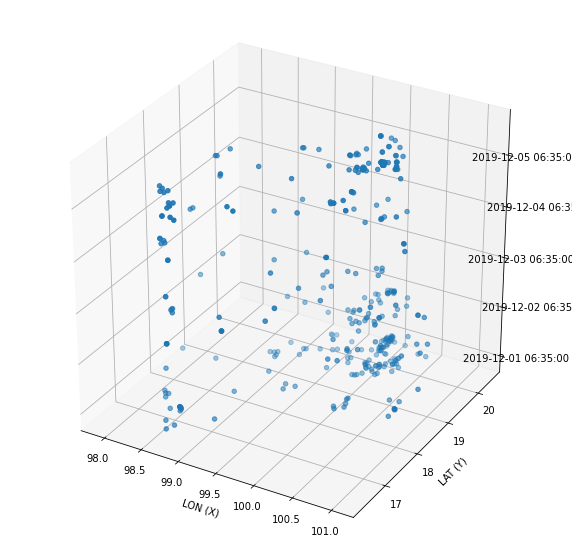

In [7]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca(projection='3d') 
ax.scatter(data_to_plot.LONGITUDE,data_to_plot.LATITUDE,data_to_plot.datetime_numeric) 
plt.xlabel('LON (X)') 
plt.ylabel('LAT (Y)') 
ax.set_zticks([0,1,2,3,4]) 
ax.set_zticklabels(["2019-12-01 06:35:00","2019-12-02 06:35:00","2019-12-03 06:35:00","2019-12-04 06:35:00","2019-12-05 06:35:00",])
for tick in ax.zaxis.get_major_ticks()[1::2]:
    tick.set_pad(15)

plt.show()